# Importing Libraries

In [22]:
import numpy as np
import pandas as pd

# Importing dataset

In [23]:
df=pd.read_csv(r"D:\Body Fitness Evaluation\Dataset\25.csv")
df.head()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


#### Converting Categorical Columns: mood, bool_of_active to string for Label Encoding

In [24]:
df['bool_of_active'] = df['bool_of_active'].apply(str)
df['mood'] = df['mood'].apply(str)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['bool_of_active'] = le.fit_transform(df['bool_of_active'])
df['mood'] = le.fit_transform(df['mood'])

# Data Visualization

In [26]:
import matplotlib as plt
import seaborn as sns

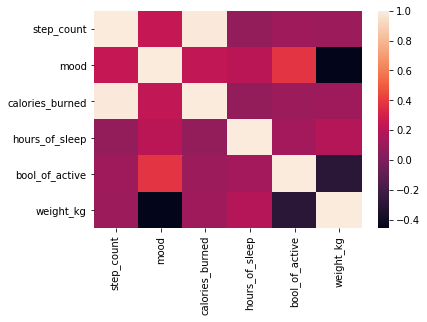

In [27]:
correlation=df.corr()
sns.heatmap(correlation)

# Handling Null Values

In [28]:
df.isnull().any()

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

## Independent attributes
#### 1.step_count
#### 2.mood
#### 3.calories_burned
#### 4.hours_of_sleep
#### 5.weight_kg
## Dependent attributes - to predict
#### 1.bool_of_active

# Splitting data into x, y

In [29]:
x=df.iloc[:,[1,2,3,4,6]].values
x[0,:]

array([5464,    1,  181,    5,   66], dtype=int64)

In [30]:
y=df.iloc[:,5:6].values
y[0,:]

array([0])

# One Hot Encoding
### Columns : mood

In [31]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
z=one.fit_transform(x[:,1:2]).toarray()
x=np.delete(x,1,axis=1)
x=np.concatenate((z,x),axis=1)

In [32]:
x[0,:]

array([0.000e+00, 1.000e+00, 0.000e+00, 5.464e+03, 1.810e+02, 5.000e+00,
       6.600e+01])

In [33]:
x.shape

(96, 7)

# Splitting data into Train and Test

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 0)

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Applying Classification Algorithm - Logistic Regression

## Training the model

In [36]:
from sklearn.linear_model import LogisticRegression
lsr=LogisticRegression()
lsr.fit(x_train,y_train)

C:\Users\suchi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Testing the model

In [37]:
lrspred = lsr.predict(x_test)
lrspred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [38]:
lrspred1 = lsr.predict(sc.transform([[0.000e+00, 1.000e+00, 0.000e+00, 5.464e+03, 1.810e+02, 5.000e+00,6.600e+01]]))
lrspred1

array([0])

# Evaluation 
### Checking the accuracy of the model

In [17]:
from sklearn.metrics import accuracy_score
lrsacc = accuracy_score(y_test,lrspred)
lrsacc

0.8666666666666667

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lrspred)
cm

array([[7, 1],
       [1, 6]], dtype=int64)

### ROC-AUC Curves

In [19]:
import sklearn.metrics as metrics
fpr1,tpr1,threshold1 = metrics.roc_curve(y_test,lrspred)
roc_auc1 = metrics.auc(fpr1,tpr1)

Text(0.5, 0, 'tpr')

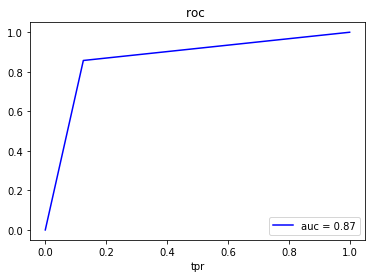

In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,"b",label = "auc = %0.2f"%roc_auc1)
plt.legend(loc = 'lower right')
plt.title("roc ")
plt.xlabel("fpr")
plt.xlabel("tpr")

# Saving the Model

In [22]:
import pickle
pickle.dump(lsr,open("BodyFitnessPredictionModel.pkl","wb"))
pickle.dump(sc,open("BodyFitnessPredictionScaler.pkl","wb"))